TypeError: Invalid shape (780, 250, 2) for image data

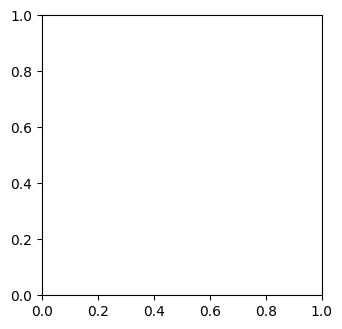

In [38]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Membaca citra grayscale
img = cv2.imread('IoriYagami.jpg', cv2.IMREAD_GRAYSCALE)

# Dekomposisi wavelet Haar level 1
coeffs = pywt.wavedec2(img, 'haar', level=1)
cA1, (cH1, cV1, cD1) = coeffs[0], coeffs[1]

# Menampilkan hasil dekomposisi
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(cA1, cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(cH1, cmap='gray')

plt.subplot(2, 2, 3)
plt.imshow(cV1, cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(cD1, cmap='gray')

plt.tight_layout()
plt.show()


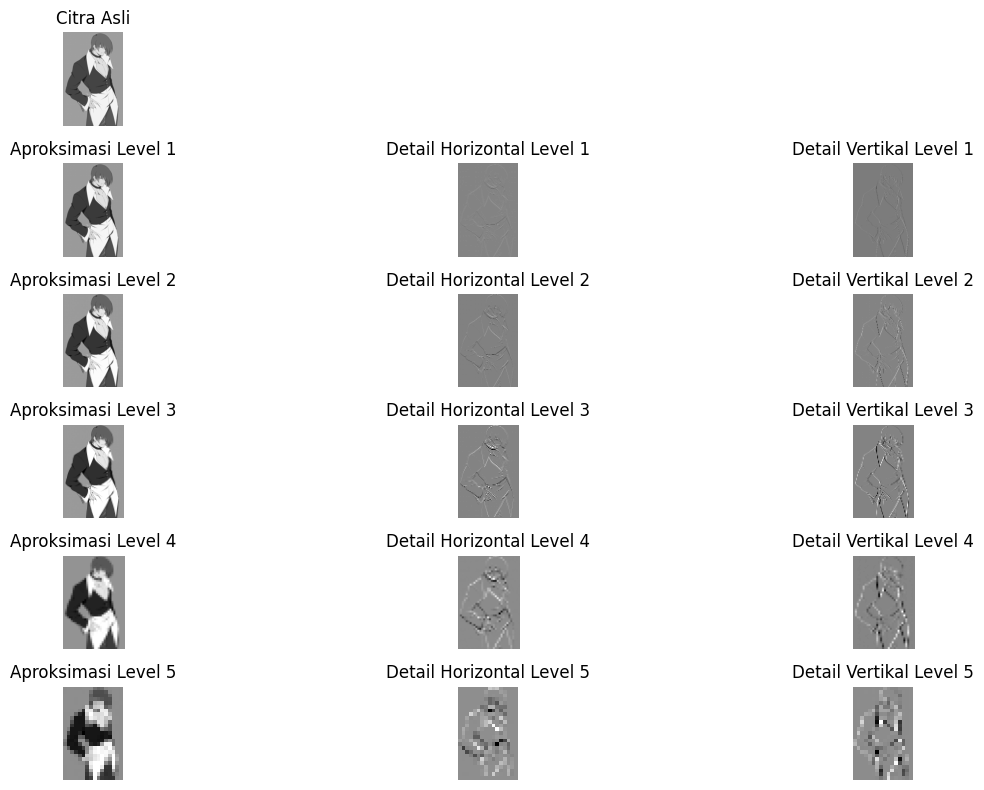

In [ ]:


def tampilkan_dekomposisi_citra(img_path, wavelet='haar', max_level=5):
    # Membaca citra grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Menyimpan citra asli untuk digunakan sebagai aproksimasi level pertama
    approx = img.astype(np.float32)
    
    plt.figure(figsize=(12, 8))
    plt.subplot(max_level + 1, 3, 1)
    plt.imshow(approx, cmap='gray')
    plt.title('Citra Asli')
    plt.axis('off')
    
    for level in range(1, max_level + 1):
        # Melakukan dekomposisi wavelet
        coeffs = pywt.wavedec2(approx, wavelet, level=1)
        cA, (cH, cV, cD) = coeffs[0], coeffs[1]
        
        # Menampilkan aproksimasi dan detail untuk level saat ini
        plt.subplot(max_level + 1, 3, 3*level + 1)
        plt.imshow(cA, cmap='gray')
        plt.title(f'Aproksimasi Level {level}')
        plt.axis('off')
        
        plt.subplot(max_level + 1, 3, 3*level + 2)
        plt.imshow(cH, cmap='gray')
        plt.title(f'Detail Horizontal Level {level}')
        plt.axis('off')
        
        plt.subplot(max_level + 1, 3, 3*level + 3)
        plt.imshow(cV, cmap='gray')
        plt.title(f'Detail Vertikal Level {level}')
        plt.axis('off')
        
        # Persiapkan aproksimasi untuk level berikutnya
        approx = cA
    
    plt.tight_layout()
    plt.show()

# Contoh pemanggilan fungsi untuk menampilkan dekomposisi citra
img_path = 'IoriYagami.jpg'
tampilkan_dekomposisi_citra(img_path, wavelet='haar', max_level=5)

    
